# Quarentena Dados - Aula 02

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv('aula01_data.csv') # Dataset da Aula01 já ordenada pelos filmes com maiores notas
ratings_dataset = pd.read_csv('data//ratings.csv')
dataset.head()

,movieId,title,genres,rating_avg,year,total_votes
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.92,1995.0,215.0
1,2,Jumanji,Adventure|Children|Fantasy,3.43,1995.0,110.0
2,3,Grumpier Old Men,Comedy|Romance,3.26,1995.0,52.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,2.36,1995.0,7.0
4,5,Father of the Bride Part II,Comedy,3.07,1995.0,49.0


## Desafio 01 - Rotacionar os indices

### Plotando dados com gradiente de cores e seaborn

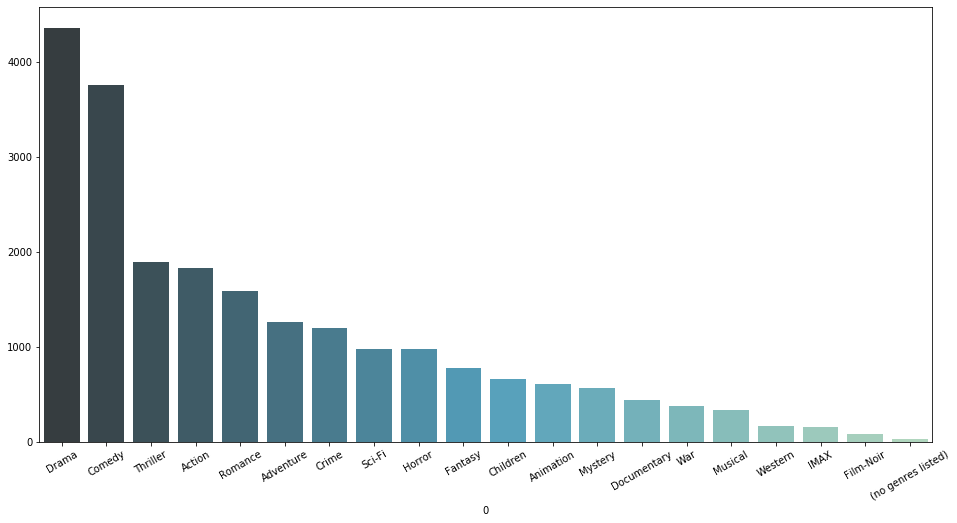

In [16]:
genres = pd.read_csv('genres.csv', header=None, index_col=0, squeeze=True)
plt.figure(figsize=(16,8))
plt.xticks(rotation=30)
sns.barplot(genres.index, genres.values, palette=sns.color_palette("GnBu_d", n_colors=20))

## Desafio 02 - Comparar outros filmes com notas proximas e encontrar distribuições diferentes

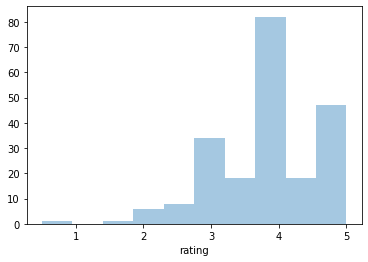

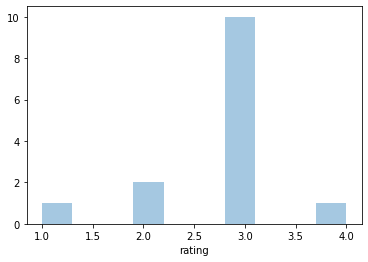

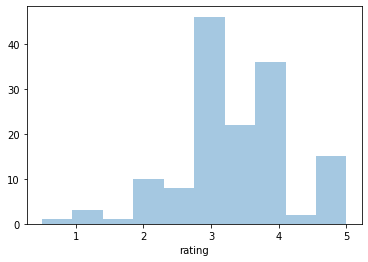

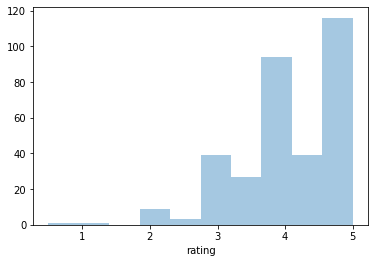

In [17]:
ordered_rating = ratings_dataset.sort_values('rating',ascending=False)

movie_list = [1,100,500, 356]

for m in movie_list:
    movie = ordered_rating.query(f'movieId=={m}')    
    sns.distplot(movie['rating'], bins=10, kde=False)    
    plt.show()
    movie.describe().T

## Desafio 03 / 04 - Criar boxplot com 10 filmes mais votados e com os nomes nas legendas

In [18]:
sorted_by_votes = dataset.sort_values('total_votes', ascending=False)
sorted_by_votes.head(10)
most_voted = sorted_by_votes.iloc[:10]
print(list(most_voted['movieId'].values))
print(list(most_voted['title'].values))

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]
['Forrest Gump ', 'Shawshank Redemption, The ', 'Pulp Fiction ', 'Silence of the Lambs, The ', 'Matrix, The ', 'Star Wars: Episode IV - A New Hope ', 'Jurassic Park ', 'Braveheart ', 'Terminator 2: Judgment Day ', "Schindler's List "]


In [39]:
ratings_dataset = pd.merge(ratings_dataset, dataset[['title', 'movieId']], on='movieId')

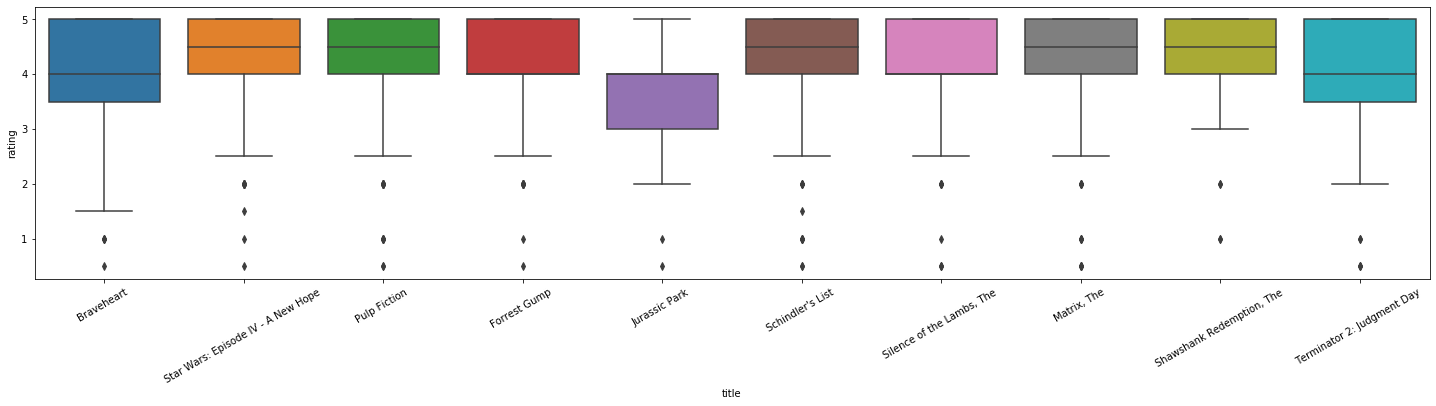

In [52]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=30)
sns.boxplot(data = ratings_dataset.query(f'movieId in {list(most_voted["movieId"].values)} ') , x='title', y='rating')


In [ ]:
## 6 plotar boxplot e histograma side by side

In [ ]:
## 7 plotar nota medias por ano